# Importing Necessary Libraires

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.9 MB/s eta 0:00:00


In [55]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Preprocessing

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
df = pd.read_csv('/content/drive/MyDrive/movies.csv')
df.head(3)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...


In [58]:
df.shape

(722463, 20)

In [59]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                           0
title                        6
genres                  210489
original_language            0
overview                118344
popularity                   0
production_companies    385191
release_date             51854
budget                       0
revenue                      0
runtime                  34363
status                       0
tagline                 614123
vote_average                 0
vote_count                   0
credits                 224855
keywords                511999
poster_path             184734
backdrop_path           499538
recommendations         687459
dtype: int64


In [60]:
df = df.dropna(subset=['title', 'genres', 'overview', 'release_date', 'runtime'])

print("Number of rows after removing missing values:", df.shape)

Number of rows after removing missing values: (422316, 20)


In [61]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                           0
title                        0
genres                       0
original_language            0
overview                     0
popularity                   0
production_companies    152991
release_date                 0
budget                       0
revenue                      0
runtime                      0
status                       0
tagline                 329748
vote_average                 0
vote_count                   0
credits                  73224
keywords                241734
poster_path              66300
backdrop_path           240045
recommendations         388450
dtype: int64


In [62]:
unique_languages = df['original_language'].unique()

print("Unique languages:", unique_languages)

language_counts = df['original_language'].value_counts()

print(language_counts)

Unique languages: ['en' 'la' 'ko' 'es' 'no' 'cn' 'ja' 'hi' 'fi' 'ru' 'uk' 'nl' 'it' 'zh'
 'bn' 'th' 'id' 'is' 'da' 'fr' 'pl' 'te' 'pt' 'de' 'ro' 'tl' 'ta' 'ar'
 'sr' 'el' 'sv' 'gl' 'tr' 'vi' 'ml' 'bs' 'ga' 'fa' 'lv' 'nb' 'mk' 'pa'
 'cs' 'eu' 'kn' 'ca' 'sh' 'km' 'gu' 'he' 'hu' 'dz' 'xx' 'ne' 'ka' 'ms'
 'mn' 'kk' 'mr' 'af' 'et' 'bo' 'sk' 'wo' 'ur' 'hy' 'se' 'sq' 'kl' 'su'
 'ku' 'hr' 'sw' 'mi' 'sl' 'cy' 'as' 'lt' 'ps' 'qu' 'bm' 'rw' 'uz' 'bg'
 'am' 'lo' 'iu' 'si' 'zu' 'os' 'xh' 'ak' 'yi' 'mt' 'ay' 'ff' 'eo' 'st'
 'jv' 'ha' 'gn' 'lb' 'az' 'gd' 'or' 'mo' 'ln' 'my' 'ky' 'fo' 'yo' 'tg'
 'tw' 'be' 'sm' 'ie' 'co' 'rm' 'sa' 'ti' 'ab' 'fy' 'tk' 'so' 'lg' 'ht'
 'ba' 'mg' 'ss' 'dv' 'tt' 'ia' 'cr' 'ny' 'ig' 'ce' 'bi' 'nn' 'ii' 'sn'
 'nv' 'mh' 'sg' 'ki' 'to' 'ts' 'om' 'rn' 'sd' 'ks' 'gv' 'tn' 'cv' 'ug'
 'sc' 'ty' 'ch']
original_language
en    235618
fr     21241
es     20347
ja     17563
de     13404
       ...  
rn         1
ts         1
ki         1
nv         1
ch         1
Name: count, Length: 15

In [63]:
unique_gen = df['genres'].unique()

# Print the unique values
print("Unique languages:", unique_gen)

gen_counts = df['genres'].value_counts()

gen_counts.to_csv("GenreCounts.csv")

Unique languages: ['Action-Science Fiction-Horror' 'Horror-Mystery-Thriller'
 'Action-Adventure-Science Fiction' ... 'Music-Crime-Adventure-Romance'
 'Documentary-Science Fiction-Mystery-Fantasy'
 'Animation-Science Fiction-Comedy-Documentary']


In [64]:
df = df[df['original_language'] == 'en']

print("Number of rows after filtering for English movies:", df.shape)

Number of rows after filtering for English movies: (235618, 20)


In [65]:
df.head(3)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...


In [66]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                           0
title                        0
genres                       0
original_language            0
overview                     0
popularity                   0
production_companies     91943
release_date                 0
budget                       0
revenue                      0
runtime                      0
status                       0
tagline                 162823
vote_average                 0
vote_count                   0
credits                  43251
keywords                123978
poster_path              42819
backdrop_path           136916
recommendations         215629
dtype: int64


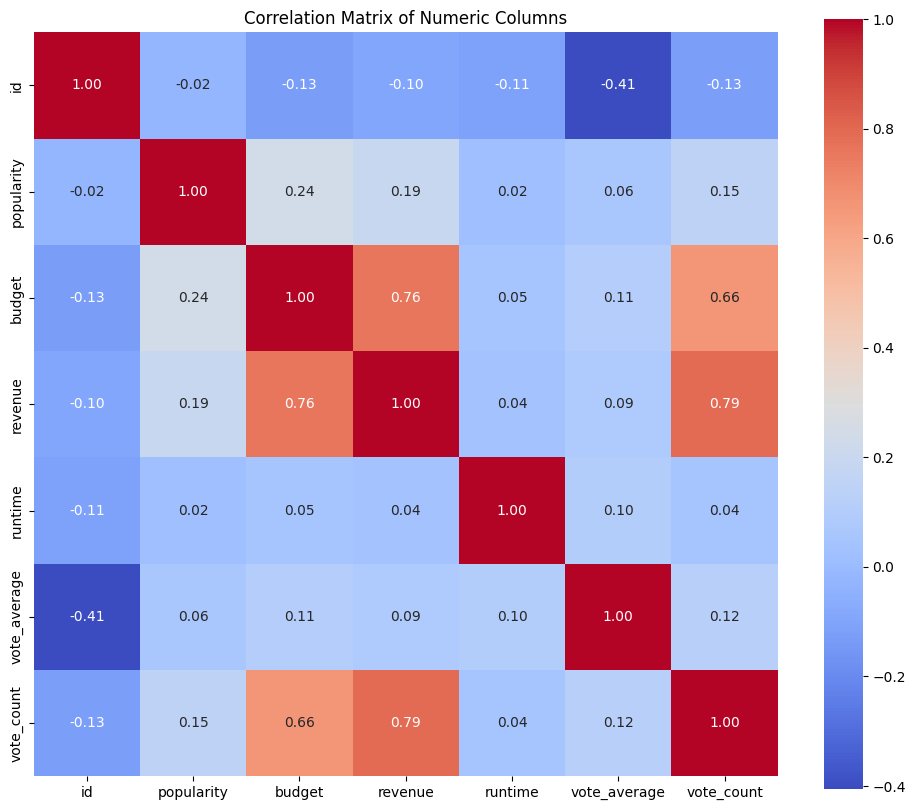

In [68]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif

df['text'] = df['title'] + ' ' + df['overview']

vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Calculate mutual information between text columns and target variable (genre)
mutual_info = mutual_info_classif(tfidf_matrix, df['genres'])

# Sort features by mutual information
sorted_features = sorted(zip(vectorizer.get_feature_names(), mutual_info), key=lambda x: x[1], reverse=True)

# Print top informative features (terms)
top_features = sorted_features[:10]  # Adjust the number of top features as needed
for feature, info_gain in top_features:
    print(f"Feature: {feature}, Information Gain: {info_gain}")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values fo

In [14]:
selected_columns = ['title', 'genres', 'overview', 'release_date', 'budget', 'revenue', 'runtime']

df = df[selected_columns]

print("Columns after removing unselected columns:")
print(df.columns)

Columns after removing unselected columns:
Index(['title', 'genres', 'overview', 'release_date', 'budget', 'revenue',
       'runtime'],
      dtype='object')


In [15]:
df.head(5)

,title,genres,overview,release_date,budget,revenue,runtime
0,Meg 2: The Trench,Action-Science Fiction-Horror,An exploratory dive into the deepest depths of...,2023-08-02,129000000.0,352056482.0,116.0
1,The Pope's Exorcist,Horror-Mystery-Thriller,Father Gabriele Amorth Chief Exorcist of the V...,2023-04-05,18000000.0,65675816.0,103.0
2,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,When a new threat capable of destroying the en...,2023-06-06,200000000.0,407045464.0,127.0
3,Dune: Part Two,Science Fiction-Adventure,Follow the mythic journey of Paul Atreides as ...,2024-02-27,190000000.0,683813734.0,167.0
4,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,Super-Hero partners Scott Lang and Hope van Dy...,2023-02-15,200000000.0,475766228.0,125.0


In [16]:
df.dropna(subset=['genres'], inplace=True)
df = df[df['genres'] != 'nan']
df.shape

(235618, 7)

In [17]:
df.to_csv("preprocessed.csv")

In [18]:
csv_filename = 'preprocessed.csv'

modified_rows = []

with open(csv_filename, 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)

    for row in reader:
        genres = row['genres'].split('-')

        if genres[0].strip() in ["TV Movie", "Documentary"]:
            modified_genre = genres[1].strip() if len(genres) > 1 else ''
        elif genres[0].strip() == "Science":
            modified_genre = "Science Fiction"
        else:
            modified_genre = genres[0].strip()

        row['genres'] = modified_genre

        modified_rows.append(row)

with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = reader.fieldnames
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()

    writer.writerows(modified_rows)

print("Genres column updated successfully!")

Genres column updated successfully!


In [19]:
unique_gens = df['genres'].unique()

print("Unique gen:", unique_gens)

gen_counts = df['genres'].value_counts()

print(gen_counts)

Unique gen: ['Action-Science Fiction-Horror' 'Horror-Mystery-Thriller'
 'Action-Adventure-Science Fiction' ...
 'Documentary-Family-Science Fiction' 'Horror-Drama-Crime-Thriller'
 'Comedy-Drama-Family-Documentary']
genres
Documentary                             47224
Drama                                   23797
Comedy                                  17989
Animation                               11579
Music                                    9826
                                        ...  
Action-Horror-TV Movie                      1
Mystery-Animation-Crime                     1
Science Fiction-Fantasy-Family-Drama        1
Drama-Action-Music-Romance                  1
Comedy-Drama-Family-Documentary             1
Name: count, Length: 7711, dtype: int64


In [20]:
df = pd.read_csv("preprocessed.csv")

# Data Visualization

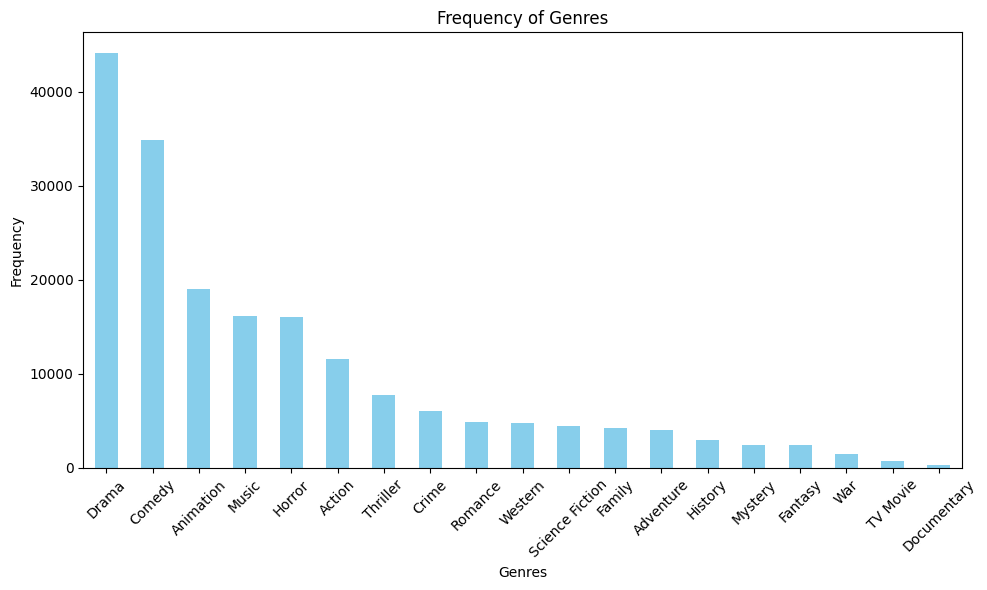

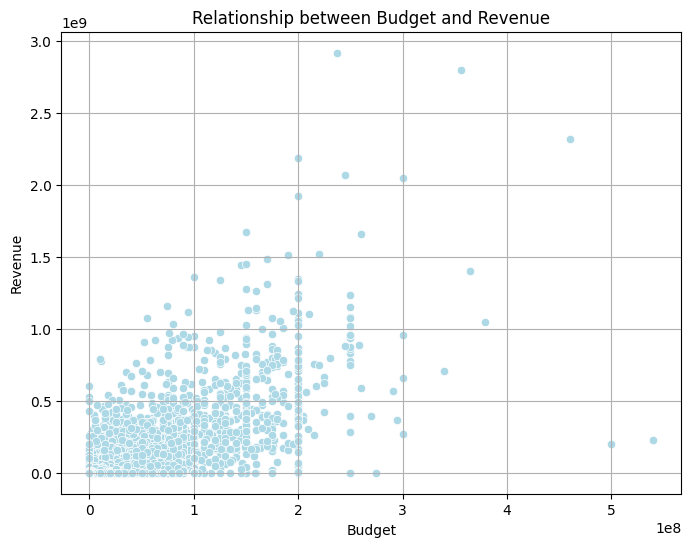

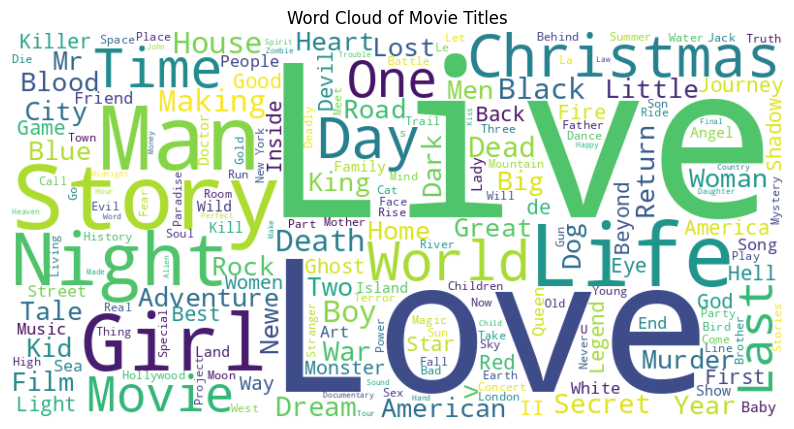

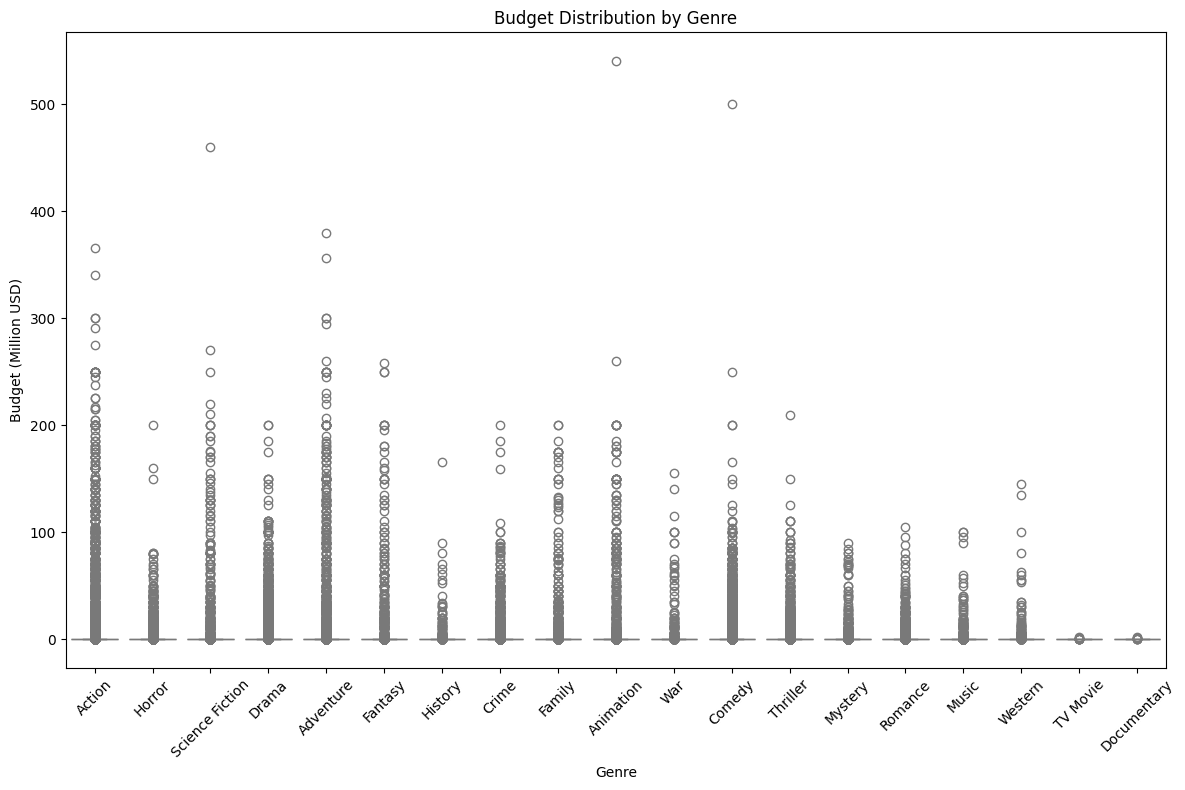

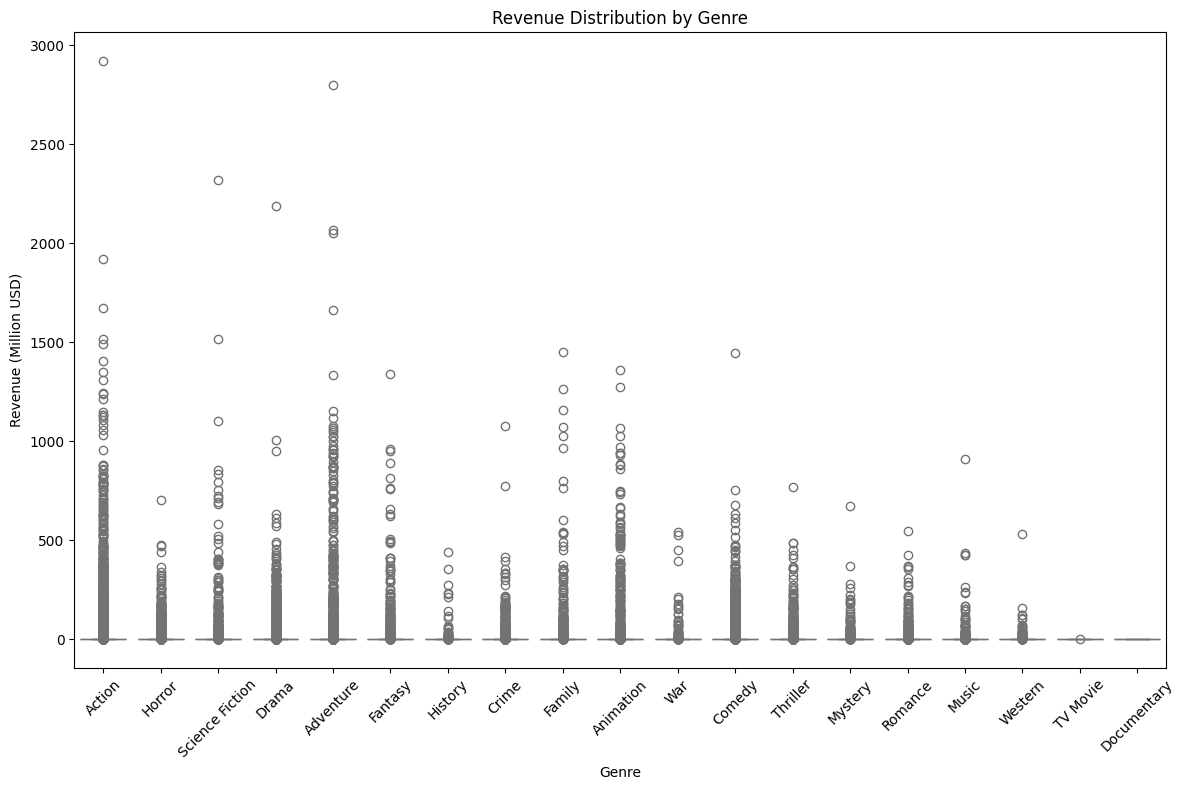

In [21]:


df = pd.read_csv("preprocessed.csv")

genre_counts = df['genres'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequency of Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizing the relationship between budget and revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', data=df, color='lightblue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Relationship between Budget and Revenue')
plt.grid(True)
plt.show()

# Creating a word cloud of movie titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

# Budget and Revenue Comparison by Genre
df['budget'] = df['budget']/1000000  # Replace 0 budget with NA to exclude from visualization
df['revenue'] = df['revenue']/1000000  # Replace 0 revenue with NA to exclude from visualization

plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='budget', data=df.dropna(subset=['budget']), color='lightblue')
plt.xlabel('Genre')
plt.ylabel('Budget (Million USD)')
plt.title('Budget Distribution by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='revenue', data=df.dropna(subset=['revenue']), color='lightgreen')
plt.xlabel('Genre')
plt.ylabel('Revenue (Million USD)')
plt.title('Revenue Distribution by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Handling Class Imbalance

In [22]:
df = df[df['genres'] != 'nan']

In [23]:
df.shape

(235618, 8)

In [24]:
df = pd.read_csv('preprocessed.csv')

genre_mapping = {
    "Romance": "Drama",
    "Adventure": "Action"
}

desired_genres = ["Drama", "Romance", "Comedy", "Action", "Adventure", "Horror", "Thriller"]

df = df[df['genres'].isin(desired_genres)]

df['genres'] = df['genres'].map(genre_mapping).fillna(df['genres'])

df = df[['title', 'overview', 'genres']]

print(df)

                                    title  \
0                       Meg 2: The Trench   
1                     The Pope's Exorcist   
2        Transformers: Rise of the Beasts   
4       Ant-Man and the Wasp: Quantumania   
5                               Creed III   
...                                   ...   
235610                           Upstream   
235613                      Tears at Dawn   
235614                             Memory   
235615                   Jerome's Bouquet   
235616              WSU The Final Chapter   

                                                 overview  genres  
0       An exploratory dive into the deepest depths of...  Action  
1       Father Gabriele Amorth Chief Exorcist of the V...  Horror  
2       When a new threat capable of destroying the en...  Action  
4       Super-Hero partners Scott Lang and Hope van Dy...  Action  
5       After dominating the boxing world Adonis Creed...   Drama  
...                                                

In [25]:
X = df[['title', 'overview']]
y = df['genres']

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

balanced_df = pd.DataFrame(X_resampled, columns=['title', 'overview'])
balanced_df['genres'] = y_resampled
balanced_df.shape

balanced_df.to_csv('Balanced_Preprocessed.csv', index=False)

# text lengths

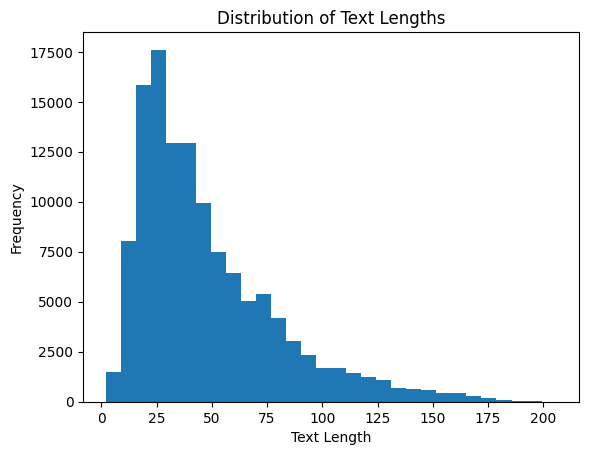

Max Length: 206
Embedding Dimension: 100


In [26]:
from keras.preprocessing.text import Tokenizer
import pandas as pd

# Concatenate 'title' and 'overview' columns
df['combined_text'] = df['title'] + ' ' + df['overview']

# Tokenize combined text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['combined_text'])
sequences = tokenizer.texts_to_sequences(df['combined_text'])

# Calculate text lengths
text_lengths = [len(sequence) for sequence in sequences]

# Calculate max length
max_length = max(text_lengths)

# Choose embedding dimension
embedding_dim = 100  # Example value

# Plot histogram of text lengths
plt.hist(text_lengths, bins=30)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

print("Max Length:", max_length)
print("Embedding Dimension:", embedding_dim)


# Model Training

In [27]:
df.head(1)

,title,overview,genres,combined_text
0,Meg 2: The Trench,An exploratory dive into the deepest depths of...,Action,Meg 2: The Trench An exploratory dive into the...


### Naive Bayes Model

In [28]:
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_resampled['overview'])

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_resampled, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
vocabulary_size = len(vectorizer.get_feature_names_out())
print("Vocabulary Size:", vocabulary_size)

y_pred = nb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy*100)

Vocabulary Size: 91729
              precision    recall  f1-score   support

      Action       0.76      0.73      0.74      9638
      Comedy       0.73      0.62      0.67      9824
       Drama       0.65      0.57      0.61      9719
      Horror       0.74      0.78      0.76      9930
    Thriller       0.64      0.79      0.71      9848

    accuracy                           0.70     48959
   macro avg       0.70      0.70      0.70     48959
weighted avg       0.70      0.70      0.70     48959

Overall Accuracy: 69.96466431095406


In [29]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=1, ngram_range=(1, 2))
nb_classifier = MultinomialNB(alpha=0.1)

X_vectorized = tfidf_vectorizer.fit_transform(X_resampled['overview'])

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_resampled, test_size=0.2, random_state=42)

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy*100)

              precision    recall  f1-score   support

      Action       0.91      0.95      0.93      9638
      Comedy       0.87      0.79      0.83      9824
       Drama       0.83      0.73      0.78      9719
      Horror       0.91      0.97      0.94      9930
    Thriller       0.91      0.99      0.95      9848

    accuracy                           0.89     48959
   macro avg       0.89      0.89      0.89     48959
weighted avg       0.89      0.89      0.89     48959

Overall Accuracy: 88.86415163708409


In [31]:
title = "Dark Echoes"
overview = "When renowned journalist Sarah Harper receives a mysterious phone call from an unknown caller, she's plunged into a dangerous game of cat and mouse that threatens to unravel her life. As she delves deeper into the caller's cryptic messages, Sarah discovers a web of deceit and betrayal stretching back decades. With her every move watched and her every secret exposed, Sarah must race against time to uncover the truth before it's too late. But as she gets closer to the heart of the mystery, she realizes that some secrets are best left buried, and that the truth may be more sinister than she ever imagined."

input_vectorized = tfidf_vectorizer.transform([title + " " + overview])

predicted_genre = nb_classifier.predict(input_vectorized)

print("Predicted Genre:", predicted_genre[0])

Predicted Genre: Thriller


### Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)  # You may need to adjust max_iter depending on convergence
lr_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred_lr))
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Overall Accuracy:", accuracy_lr)


              precision    recall  f1-score   support

      Action       0.88      0.92      0.90      9638
      Comedy       0.80      0.77      0.79      9824
       Drama       0.77      0.71      0.74      9719
      Horror       0.90      0.93      0.92      9930
    Thriller       0.92      0.97      0.94      9848

    accuracy                           0.86     48959
   macro avg       0.86      0.86      0.86     48959
weighted avg       0.86      0.86      0.86     48959

Overall Accuracy: 0.8598623337894973


In [34]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df = pd.read_csv('/content/drive/MyDrive/Balanced_Preprocessed.csv')
df.head(3)

,title,overview,genres
0,Meg 2: The Trench,An exploratory dive into the deepest depths of...,Action
1,The Pope's Exorcist,Father Gabriele Amorth Chief Exorcist of the V...,Horror
2,Transformers: Rise of the Beasts,When a new threat capable of destroying the en...,Action


In [37]:
df.shape

(244795, 3)

In [38]:

df = pd.read_csv('Balanced_Preprocessed.csv')

df = df.dropna()

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(df['overview'])

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, df['genres'], test_size=0.2, random_state=42)

### RandomForest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred_rf))
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Overall Accuracy:", accuracy_rf)

              precision    recall  f1-score   support

      Action       0.96      0.96      0.96      9638
      Comedy       0.84      0.78      0.81      9824
       Drama       0.78      0.83      0.80      9719
      Horror       0.96      0.97      0.97      9930
    Thriller       1.00      1.00      1.00      9848

    accuracy                           0.91     48959
   macro avg       0.91      0.91      0.91     48959
weighted avg       0.91      0.91      0.91     48959

Overall Accuracy: 0.9073918993443494


In [40]:
# Save the model
import joblib
joblib.dump(rf_classifier, 'Random_Forest.pkl')

['Random_Forest.pkl']

# Multi-Layer Perceptron Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train and evaluate MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000)
mlp_classifier.fit(X_train, y_train_encoded)
y_pred_mlp = mlp_classifier.predict(X_test)
print("\nMulti-Layer Perceptron:")
print(classification_report(y_test_encoded, y_pred_mlp))
accuracy_mlp = accuracy_score(y_test_encoded, y_pred_mlp)
print("Accuracy:", accuracy_mlp)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")



Multi-Layer Perceptron:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      9638
           1       0.82      0.80      0.81      9824
           2       0.81      0.69      0.75      9719
           3       0.92      0.97      0.94      9930
           4       0.95      1.00      0.97      9848

    accuracy                           0.88     48959
   macro avg       0.88      0.88      0.88     48959
weighted avg       0.88      0.88      0.88     48959

Accuracy: 0.8848219939132743


In [ ]:
import joblib
joblib.dump(mlp_classifier, 'Multi_Layer_Perceptron.pkl')

['Multi_Layer_Perceptron.pkl']

In [ ]:
import joblib
joblib.dump(vectorizer, 'Random_Forest_Vectorizer.pkl')

['Random_Forest_Vectorizer.pkl']